In [1]:
import pandas as pd
# from datetime import timedelta
import matplotlib.pyplot as plt

# File paths for the inventory datasets
file_path_inventory = 'C:/Users/RH/Downloads/Inventory Dataset.xlsx'
file_path_new_inventory = 'C:/Users/RH/Downloads/New Inventory.xlsx'

# Read the inventory datasets into pandas DataFrames

df1 = pd.read_excel(file_path_inventory)           ## Inventory DF 
df2 = pd.read_excel(file_path_new_inventory)       ## New Inventory DF

# Rename columns for consistency
df2.rename(columns={'Inventory Receive': 'Date', 'Total Item Qty': 'Inventory'}, inplace=True)

# Combine the two DataFrames into a single DataFrame
combined_df = pd.concat([df1, df2], ignore_index=True)

# Extract the month and year from the 'Date' column
combined_df['Month'] = combined_df['Date'].dt.to_period('M')
# print(combined_df['Month'])


# Calculate the total inventory for each month
monthly_totals = combined_df.groupby('Month')['Inventory'].sum()

# Print total monthly inventory levels
# print("Total Monthly Inventory Levels:",monthly_totals)


# Get unique item numbers
item_numbers = combined_df['Item Number'].unique()

# Determine the start date and start day
start_date = min(df1['Date'].min(), df2['Date'].min())
# print("start_date : ",start_date)

start_day = start_date.strftime('%a')  # Get the abbreviated day name (e.g., 'Mon', 'Tue', etc.)
# print("start_day : ",start_day)

# Calculate the number of weeks to cover the entire date range
num_weeks = (combined_df['Date'].max() - start_date).days // 7 + 2
# print("num_weeks : ",num_weeks)

# Generate future dates on a weekly basis
future_dates = pd.date_range(start=start_date, periods=num_weeks, freq='W-' + start_day)
# print("future_dates : ",future_dates)


# Create an empty DataFrame with future dates as columns
output_df = pd.DataFrame(columns=['Item Number'] + future_dates.strftime('%m/%d/%Y').tolist())

# Group by 'Item Number' and aggregate inventory quantities for each future date
for item_number in item_numbers:
    item_row = [item_number]
    for date in future_dates:
        # Calculate the total inventory up to each future date for each item number
        total_inventory = combined_df[(combined_df['Item Number'] == item_number) & (combined_df['Date'] <= date)]['Inventory'].sum()
        item_row.append(total_inventory)
        
    # Concatenate the item_row to the output_df
    output_df = pd.concat([output_df, pd.DataFrame([item_row], columns=output_df.columns)])

# Reset the index of the output DataFrame
output_df.reset_index(drop=True, inplace=True)





In [4]:
# Display the resulting DataFrame
output_df 

,Item Number,06/17/2023,06/24/2023,07/01/2023,07/08/2023,07/15/2023,07/22/2023,07/29/2023,08/05/2023,08/12/2023,...,10/14/2023,10/21/2023,10/28/2023,11/04/2023,11/11/2023,11/18/2023,11/25/2023,12/02/2023,12/09/2023,12/16/2023
0,064-01-1347,3561,3561,3561,4561,10129,10129,10129,11929,11929,...,11929,11929,11929,11929,11929,11929,11929,11929,11929,11929
1,064-01-1361,4035,4035,4035,4659,11279,11279,11279,13479,13479,...,13479,13479,13479,13479,13479,13479,13479,13479,13479,13479
2,064-01-1375,2684,2684,2684,4264,6032,6032,6032,6032,6032,...,9432,9432,9432,9432,9432,9432,9432,9432,9432,9432
3,064-01-1385,5136,5136,5136,5832,11028,11028,11028,13228,13228,...,13228,13228,13228,13228,13228,13228,13228,13228,13228,13228
4,064-01-1399,6399,6399,6399,7299,15435,15435,15435,17435,17435,...,17435,17435,17435,17435,17435,17435,17435,17435,17435,17435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,064-18-9904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18700,18700,23800
399,064-18-0309,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12424,20500,20500
400,064-18-4752,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12424,20500,20500
401,064-18-3496,0,0,0,0,0,0,0,0,0,...,30752,30752,30752,30752,30752,30752,30752,30752,30752,30752


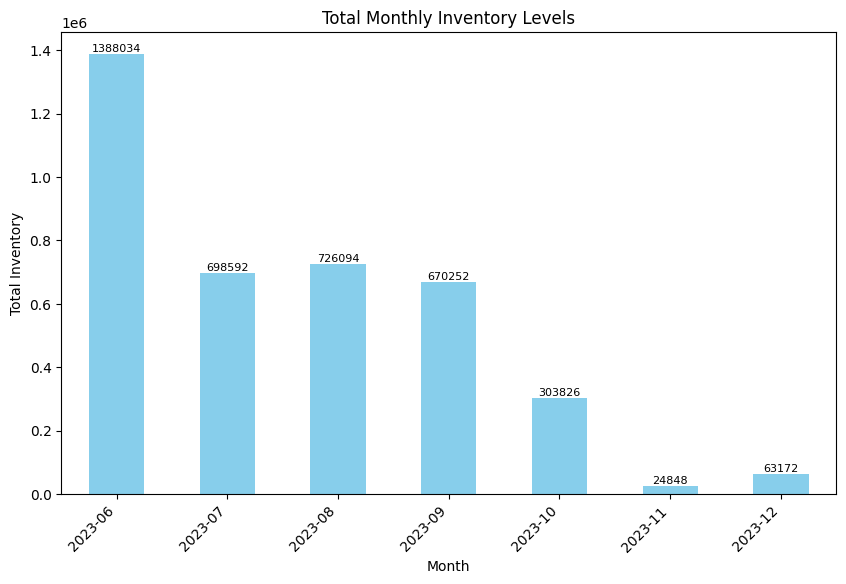

In [5]:
# Plotting the bar chart for total monthly inventory levels with values on top of each bar
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size (width=10, height=6)
bars = monthly_totals.plot(kind='bar', color='skyblue')  # Plot a bar chart and capture the bar objects

# Add values on top of each bar
for bar in bars.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.title('Total Monthly Inventory Levels')  # Set the title of the plot
plt.xlabel('Month')  # Set the label for the x-axis
plt.ylabel('Total Inventory')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


In [ ]:
output_df.to_csv("C:/Users/RH/Downloads/output_df.csv",index=False) # Create a CSV file
print("CSV file Generated Sucessfully")